In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np

from optimizer import Optimizer
from network import build_shallow_network, cross_entropy_loss

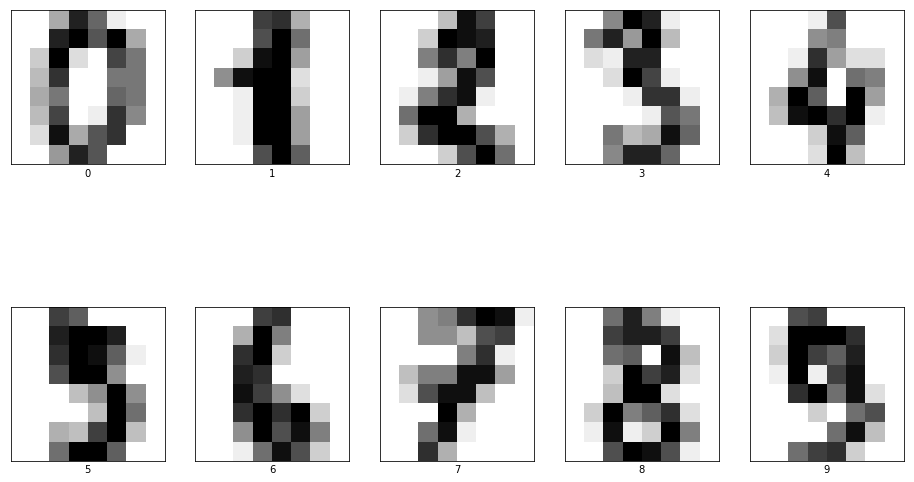

In [2]:
X, y = load_digits(return_X_y=True)
X /= 16

plt.figure("figsize", (16, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xlabel(str(y[i]))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[i].reshape((8, 8)), cmap=plt.cm.binary)
plt.show()

In [3]:
random_state = np.random.RandomState(0)
print("dataset shape: {}, classes count: {}".format(X.shape, len(set(y))))
test_size = 500
validation_part = 0.1
X, X_test, y, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
)
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=validation_part, random_state=random_state
)
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

dataset shape: (1797, 64), classes count: 10
(1167, 64)
(130, 64)
(500, 64)


In [4]:
model = build_shallow_network(X.shape[1], 10)
loss_function = cross_entropy_loss(10)
opt = Optimizer(model, loss_function)
model = opt.fit(
    X_train, y_train, eval_set=(X_validation, y_validation),
    n_epochs=100, learning_rate=1, batch_size=200
)

epoch 1:   train loss: 1.9803    validation loss: 1.5489    
epoch 2:   train loss: 1.3479    validation loss: 1.1077    
epoch 3:   train loss: 0.99013   validation loss: 0.87368   
epoch 4:   train loss: 0.80338   validation loss: 0.72638   
epoch 5:   train loss: 0.67341   validation loss: 0.62435   
epoch 6:   train loss: 0.59339   validation loss: 0.55999   
epoch 7:   train loss: 0.523     validation loss: 0.50839   
epoch 8:   train loss: 0.487     validation loss: 0.46658   
epoch 9:   train loss: 0.45048   validation loss: 0.43975   
epoch 10:  train loss: 0.40808   validation loss: 0.41333   
epoch 11:  train loss: 0.39181   validation loss: 0.397     
epoch 12:  train loss: 0.35775   validation loss: 0.37495   
epoch 13:  train loss: 0.34205   validation loss: 0.36332   
epoch 14:  train loss: 0.347     validation loss: 0.34522   
epoch 15:  train loss: 0.32199   validation loss: 0.33447   
epoch 16:  train loss: 0.31127   validation loss: 0.32197   
epoch 17:  train loss: 0

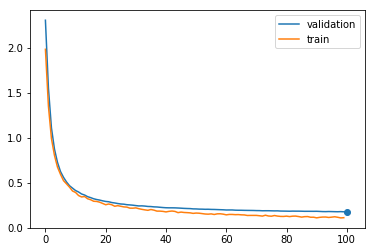

test accuracy:       0.968
train accuracy:      0.9837189374464439
validation accuracy: 0.9384615384615385


In [5]:
plt.plot(opt.validation_err_log, label="validation")
best_iteration = np.argmin(opt.validation_err_log)
plt.scatter(best_iteration, opt.validation_err_log[best_iteration])
plt.plot(opt.train_err_log, label="train")
plt.legend()
plt.show()

def calc_accuracy(model, X, y):
    predicted_probs = np.array(model(X.T))
    y_prected = np.argmax(predicted_probs, axis=0)
    return accuracy_score(y, y_prected)

print("test accuracy:       {}".format(calc_accuracy(model, X_test, y_test)))
print("train accuracy:      {}".format(calc_accuracy(model, X_train, y_train)))
print("validation accuracy: {}".format(calc_accuracy(model, X_validation, y_validation)))